# Líneas de espera

In [7]:
import random
from matplotlib.pyplot import *
from statistics import mean, median, stdev, variance
import matplotlib.pyplot as plt

### La distribución exponencial

Función de densidad:
    
$f_X (x) = \lambda e^{-\lambda x}$  para $x \geq 0$

y función de distribución:

$F_X (x) = 1 - e^{-\lambda x}$  para $x \geq 0$

Puede ser simulada por el método de inversión mediante el siguiente algoritmo:

0. Hacer $L = -\frac{1}{\lambda}$
1. Generar $U \sim U(0, 1)$
2. Devolver $X = L \cdot Ln(U)$

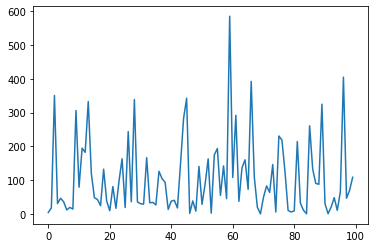

In [8]:
#Generamos una lista de números aleatorios que siguen la distribución exponencial.

nums = []
lamb = 0.01                                     # Párametro de la función exponencial
L = -1.0/lamb #inversa de lambda

for i in range(100):
    temp = L*np.log(random.random())            # Pasos 1 y 2
    nums.append(temp)

plt.plot(nums)
plt.show()

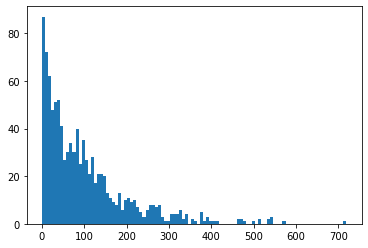

Media: 100.15598.  Mediana: 71.47864.
Varianza: 10299.36428.  Desviación estándar: 101.48578.


In [10]:
sample = []
lamb = 0.01                                     # Párametro de la función exponencial
L = -1.0/lamb #inversa de lambda

for i in range(1000):
    temp = L*np.log(random.random())
    sample.append(temp)

plt.hist(sample, bins = 100)
plt.show()


print(f'Media: {mean(sample):.5f}.  Mediana: {median(sample):.5f}.')
print(f'Varianza: {variance(sample):.5f}.  Desviación estándar: {stdev(sample):.5f}.')

La función exponencial tiene una propiedad muy importante.
Amnesia o falta de memoria:

$P(t>T+S| t>S) = P(t>T)$

## Ejercicio:

1. Demostrar la propiedad anterior.

Una simulación de eventos discretos permite modelar una línea de espera.

In [11]:
Avg_IAT = 2.0 # Promedio de Tiempo Inter-Arrivo
Sim_Time = 100 # Tiempo total de simulacion

N = 0 # Numero de arrivos

clock = 0 # Tiempo de simulación

while clock <= Sim_Time:
    N = N + 1
    # Avance del tiempo de simulacion
    clock = clock + expovariate(1/Avg_IAT)

print('Númeor Total de Arrivos = ', N)

Númeor Total de Arrivos =  45


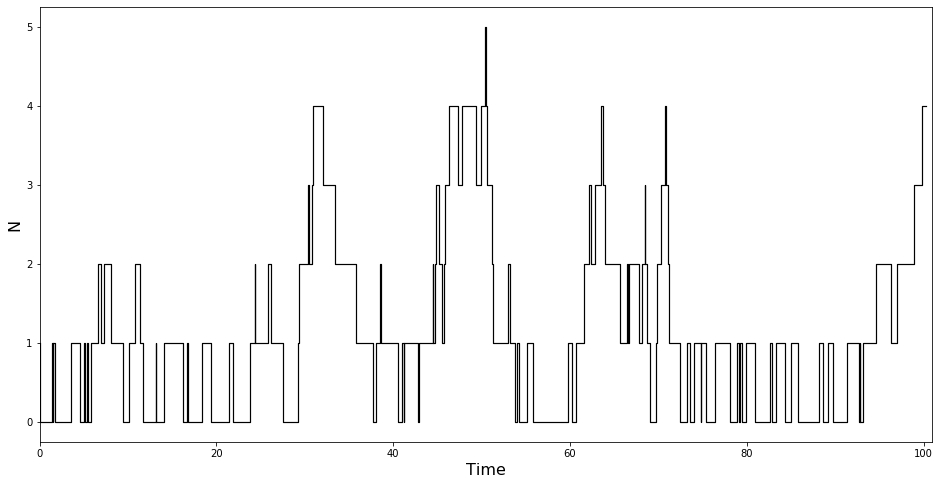

In [12]:

Avg_IAT = 2.0

Avg_ST = 1.0 # Tiempo de servicio promedio
Sim_Time = 100 # Tiempo Total de Simulacion

N = 0
clock = 0 # Tiempo de simulacion
X = [] # Tiempo de eventos
Y = [] # Valores de N

while clock <= Sim_Time:
    IAT = expovariate(1 / Avg_IAT)
    ST = expovariate(1 / Avg_ST)
    if IAT <= ST:
        N += 1
        clock = clock + IAT
        X.append(clock)
        Y.append(N)
    else:
        if N > 0:
            N -= 1
            clock = clock + ST
            X.append(clock)
            Y.append(N)

fig = figure(1, figsize=(16, 8))
step(X, Y, Linewidth=1.2, color='black')
xlabel('Time', size=16)
ylabel('N', size=16)
xlim(0, 101)
show()